### Import Libraries

In [58]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',3)

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from google.colab import files

from sklearn import set_config
set_config(display='text') #estimators now will be displayed in text, the default is diagrams

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
crabs = files.upload()

Saving 5 - crabs.csv to 5 - crabs (2).csv


In [3]:
crabs = pd.read_csv('5 - crabs.csv')
pd.set_option('display.max_rows', None)
crabs.head(10)

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
5,B,M,6,10.8,9.0,23.0,26.5,9.8
6,B,M,7,11.1,9.9,23.8,27.1,9.8
7,B,M,8,11.6,9.1,24.5,28.4,10.4
8,B,M,9,11.8,9.6,24.2,27.8,9.7
9,B,M,10,11.8,10.5,25.2,29.3,10.3


### Welcome to PCA

In [4]:
 crabs = crabs.rename(columns = {'sp':'species','FL':'Frontal Lobe', 'RW':'Rear Width', 'CL':'Carapage Midline', 'CW':'Maximum Width', 'BD':'Body Depth'})

In [5]:
crabs.tail(10)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth
190,O,F,41,20.3,16.0,39.4,44.1,18.0
191,O,F,42,20.5,17.5,40.0,45.5,19.2
192,O,F,43,20.6,17.5,41.5,46.2,19.2
193,O,F,44,20.9,16.5,39.9,44.7,17.5
194,O,F,45,21.3,18.4,43.8,48.4,20.0
195,O,F,46,21.4,18.0,41.2,46.2,18.7
196,O,F,47,21.7,17.1,41.7,47.2,19.6
197,O,F,48,21.9,17.2,42.6,47.4,19.5
198,O,F,49,22.5,17.2,43.0,48.7,19.8
199,O,F,50,23.1,20.2,46.2,52.5,21.1


In [6]:
crabs['species'] = crabs['species'].map({'B':'Blue', 'O':'Orange'})
crabs['sex'] = crabs['sex'].map({'F':'Female', 'M':'Male'})
crabs.tail(10)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth
190,Orange,Female,41,20.3,16.0,39.4,44.1,18.0
191,Orange,Female,42,20.5,17.5,40.0,45.5,19.2
192,Orange,Female,43,20.6,17.5,41.5,46.2,19.2
193,Orange,Female,44,20.9,16.5,39.9,44.7,17.5
194,Orange,Female,45,21.3,18.4,43.8,48.4,20.0
195,Orange,Female,46,21.4,18.0,41.2,46.2,18.7
196,Orange,Female,47,21.7,17.1,41.7,47.2,19.6
197,Orange,Female,48,21.9,17.2,42.6,47.4,19.5
198,Orange,Female,49,22.5,17.2,43.0,48.7,19.8
199,Orange,Female,50,23.1,20.2,46.2,52.5,21.1


In [8]:
crabs.columns
crabs.shape

(200, 8)

Separate the 200 crabs into 4 classes, given by 2x2 configurations for sex and species

In [9]:
crabs['class'] = crabs.species + crabs.sex
crabs['class'].value_counts()

class
BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: count, dtype: int64

In [10]:
crabs.head(10)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
5,Blue,Male,6,10.8,9.0,23.0,26.5,9.8,BlueMale
6,Blue,Male,7,11.1,9.9,23.8,27.1,9.8,BlueMale
7,Blue,Male,8,11.6,9.1,24.5,28.4,10.4,BlueMale
8,Blue,Male,9,11.8,9.6,24.2,27.8,9.7,BlueMale
9,Blue,Male,10,11.8,10.5,25.2,29.3,10.3,BlueMale


Something more complex

In [16]:
data_columns = ['Frontal Lobe', 'Rear Width','Carapage Midline','Maximum Width', 'Body Depth']
crabs[data_columns].describe()

,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,15.583000,12.73850,32.105500,36.414500,14.030500
std,3.495325,2.57334,7.118983,7.871955,3.424772
min,7.200000,6.50000,14.700000,17.100000,6.100000
25%,12.900000,11.00000,27.275000,31.500000,11.400000
50%,15.550000,12.80000,32.100000,36.800000,13.900000
75%,18.050000,14.30000,37.225000,42.000000,16.600000
max,23.100000,20.20000,47.600000,54.600000,21.600000


### Boxplot of the relevants features

<Axes: >

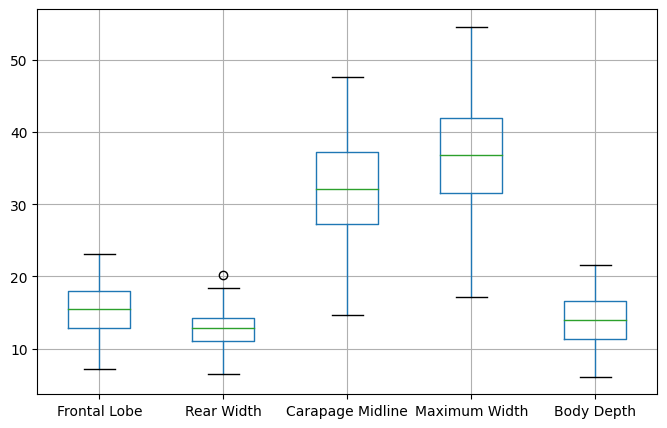

In [17]:
fig,ax = plt.subplots(figsize=(8, 5))
crabs[data_columns].boxplot()

## Initial Visualization of the Classes

<Axes: title={'center': 'Frontal Lobe'}, xlabel='class'>

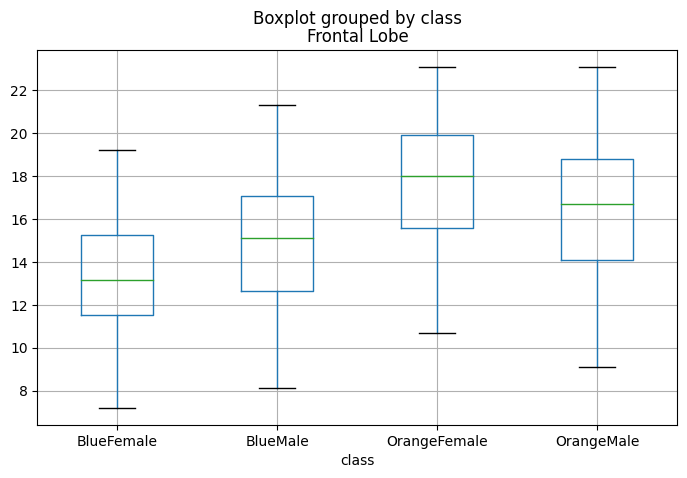

In [18]:
crabs.boxplot(column='Frontal Lobe', by = 'class', figsize=(8,5))

## Histograms Study

array([[<Axes: title={'center': 'Frontal Lobe'}>,
        <Axes: title={'center': 'Rear Width'}>,
        <Axes: title={'center': 'Carapage Midline'}>,
        <Axes: title={'center': 'Maximum Width'}>,
        <Axes: title={'center': 'Body Depth'}>, <Axes: >]], dtype=object)

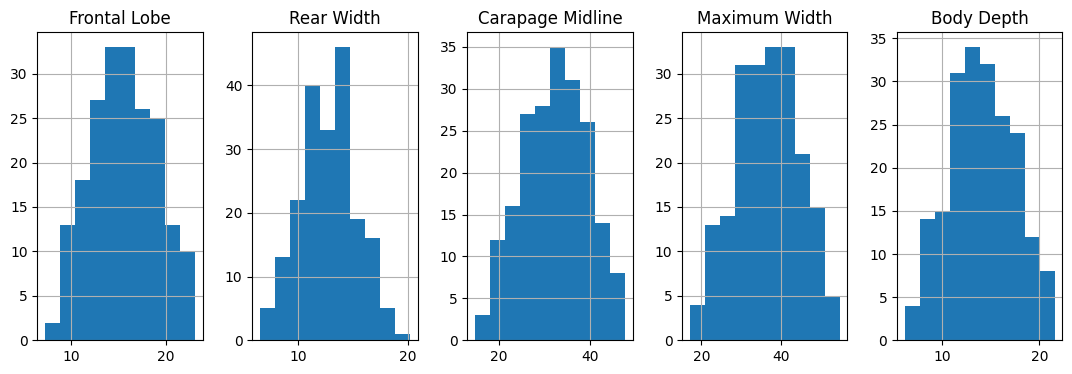

In [20]:
crabs[data_columns].hist(figsize=(16,4),layout=(1,6))

<Axes: xlabel='Frontal Lobe', ylabel='Count'>

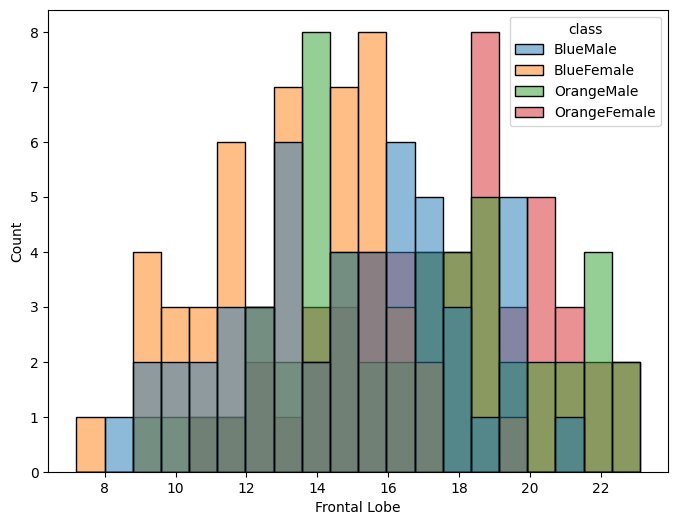

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(data=crabs, x='Frontal Lobe',hue='class', bins =20)

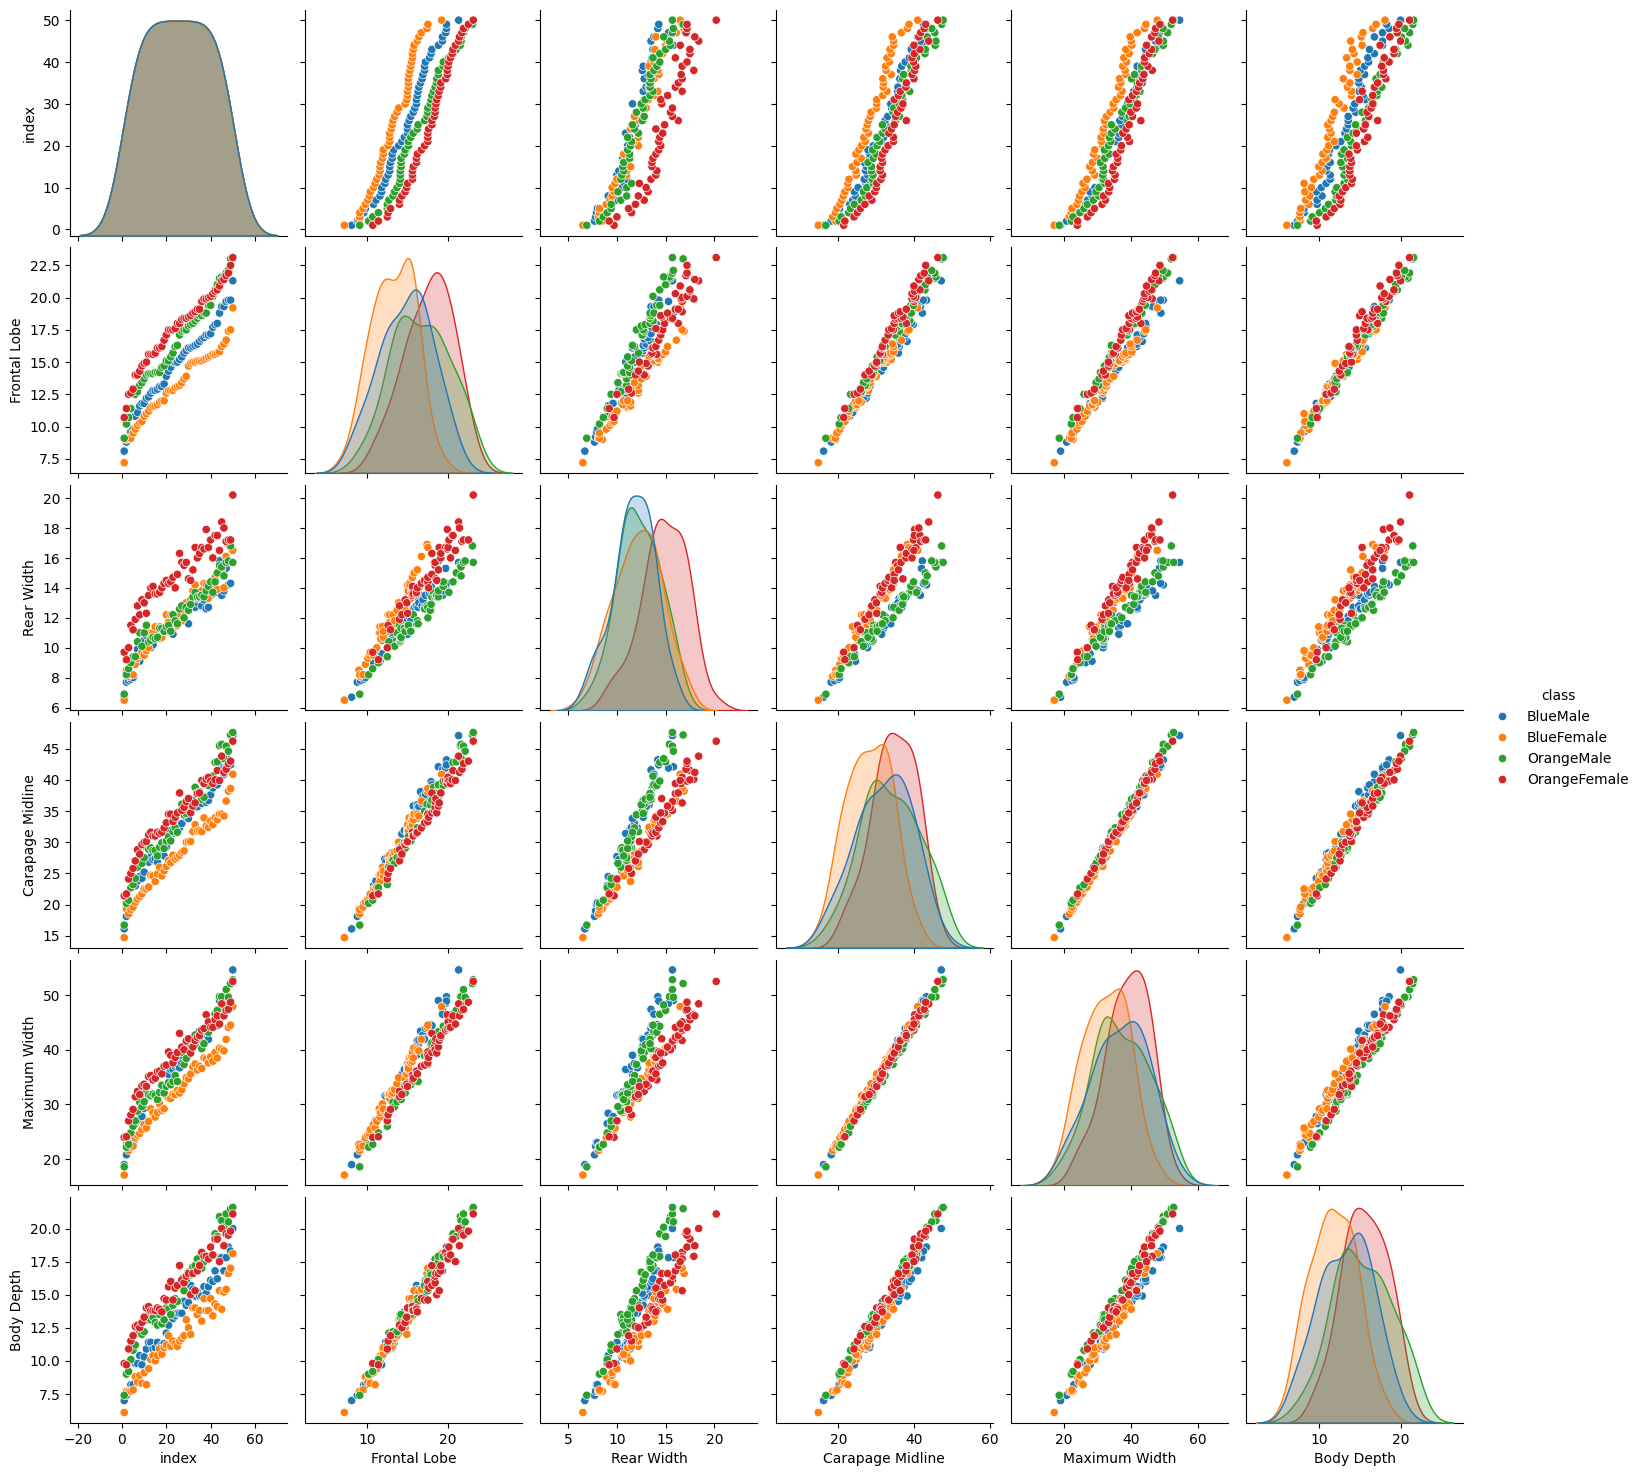

In [23]:
sns.pairplot(crabs, hue='class')

## Dive into PCA
It was a way for making a better visualization of the data

Data must be standardized in order to apply PCA. Then we will change all variables so that has value from mean range 0 to 1.

In [27]:
crabs_standardized = crabs.copy()
crabs_standardized[data_columns] = StandardScaler().fit_transform(crabs[data_columns])
crabs_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550000e+01,14.467083,1.000000,13.000000,25.500000,38.000000,50.000000
Frontal Lobe,200.0,-7.105427e-17,1.002509,-2.404365,-0.769523,-0.009465,0.707571,2.155984
Rear Width,200.0,6.039613e-16,1.002509,-2.430365,-0.677276,0.023959,0.608322,2.906815
Carapage Midline,200.0,1.065814e-16,1.002509,-2.451077,-0.680241,-0.000775,0.720938,2.181966
Maximum Width,200.0,-4.973799e-16,1.002509,-2.459741,-0.625872,0.049094,0.711325,2.315960
Body Depth,200.0,0.000000e+00,1.002509,-2.321439,-0.770008,-0.038200,0.752152,2.215766


Using PCA ∇
- The sklearn PCA method will return the explained variance ratio and all relevant PCA-related parameters
- We can use the explained variance ratio and the singular values to decide how many components to keep


In [36]:
myPCA = PCA().fit(crabs_standardized[data_columns])
print(myPCA.explained_variance_ratio_) # return a vector of the variance explained by each dimension.
print(myPCA.explained_variance_ratio_.cumsum()) # vector x such that x[i] returns the cumulative variance explained by the first i++
                                                # x[2] return first 3 dimensions

[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
[0.95776696 0.988104   0.99743059 0.99965766 1.        ]


#### Screeplot
It was used to determined the number of principal components to keep in a PCA

Text(0.5, 1.0, 'Scree Plot')

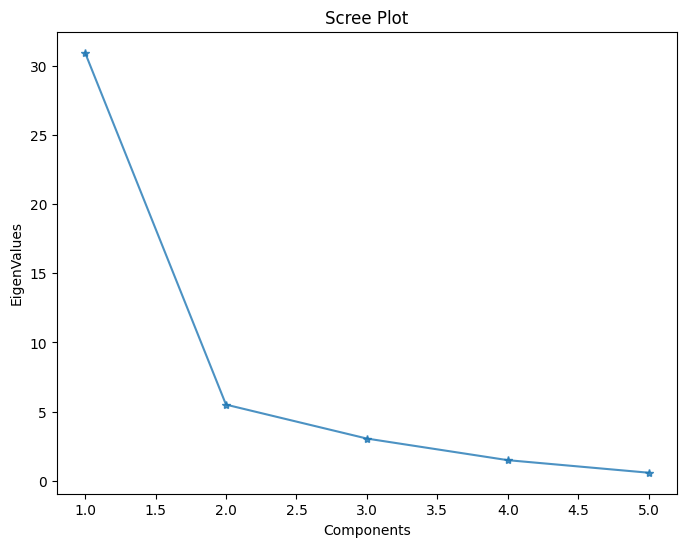

In [38]:
  fig = plt.figure(figsize=(8,6))
  # Scree Plot
  plt.plot(range(1, len(myPCA.singular_values_) + 1), myPCA.singular_values_,alpha=0.8,marker='*')
  y_label = plt.ylabel('EigenValues')
  x_label = plt.xlabel('Components')
  plt.title('Scree Plot')


### Percentage Explained Variance by Component

Text(0.5, 1.0, 'Percentage of variance explained by component')

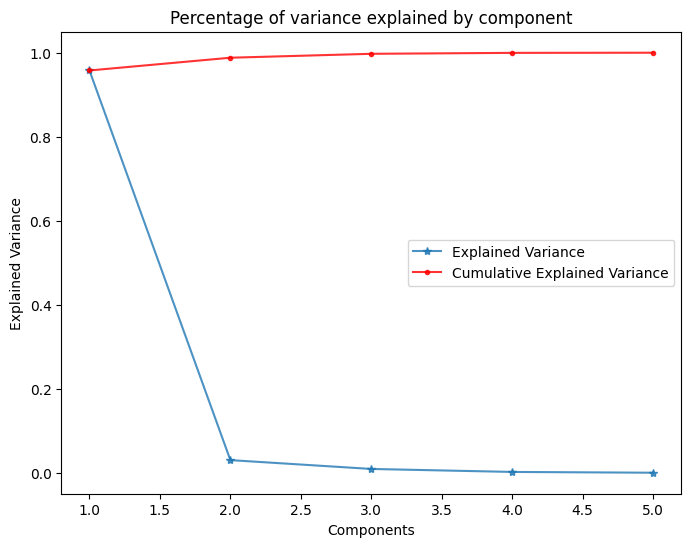

In [41]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.explained_variance_ratio_) + 1), myPCA.explained_variance_ratio_, alpha = 0.8, marker='*', label="Explained Variance")
y_label = plt.ylabel('Explained Variance')
x_label = plt.xlabel('Components')
plt.plot(range(1,len(myPCA.explained_variance_ratio_) + 1), np.cumsum(myPCA.explained_variance_ratio_),color ='r',alpha = 0.8, marker='.', label="Cumulative Explained Variance")
plt.legend()
plt.title('Percentage of variance explained by component')

We can also visualize the weights that the PCA assigns to each component.

<Axes: >

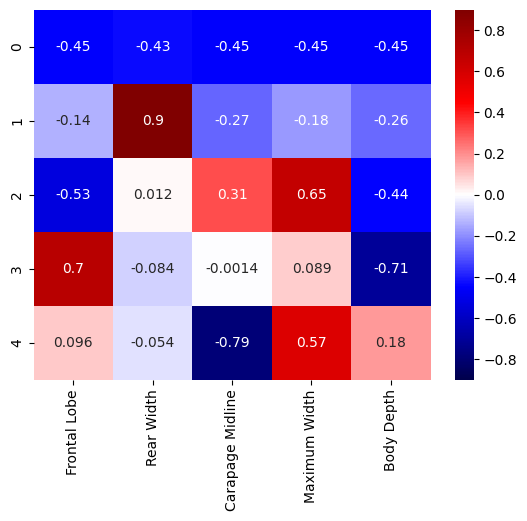

In [44]:
sns.heatmap(myPCA.components_,cmap='seismic', xticklabels = list(crabs.columns[3:-1]),
            vmin=-np.max(np.abs(myPCA.components_)), vmax=np.max(np.abs(myPCA.components_)),
            annot=True)


## PCA : Transform and Visualization

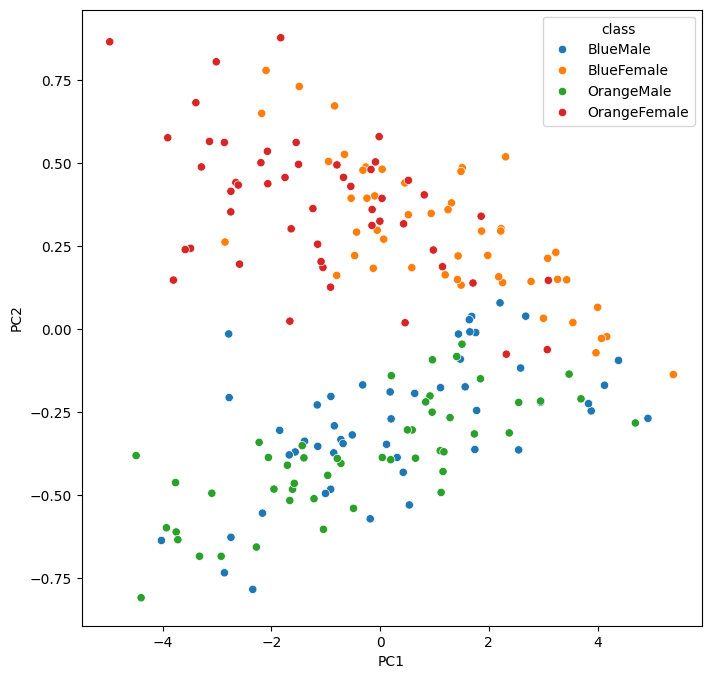

In [45]:
transformed = myPCA.transform(crabs_standardized[data_columns])
crabs_standardized[['PC1', 'PC2', 'PC3']] = transformed[:,:3]
fig = plt.figure(figsize=(8,8))
# Example for 2 components
_ = sns.scatterplot(x = 'PC1', y='PC2',hue='class', data = crabs_standardized)


In [46]:
crabs_standardized.head(5)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth,class,PC1,PC2,PC3
0,Blue,Male,1,-2.146,-2.352,-2.254,-2.218,-2.058,BlueMale,4.928,-0.268,-0.122
1,Blue,Male,2,-1.945,-1.963,-1.972,-1.989,-1.941,BlueMale,4.386,-0.094,-0.039
2,Blue,Male,3,-1.831,-1.924,-1.846,-1.785,-1.853,BlueMale,4.129,-0.169,0.034
3,Blue,Male,4,-1.716,-1.885,-1.691,-1.696,-1.707,BlueMale,3.884,-0.246,0.015
4,Blue,Male,5,-1.659,-1.846,-1.662,-1.708,-1.707,BlueMale,3.834,-0.224,-0.015


It does good with this data

### Visualize 3 Compponents PCA

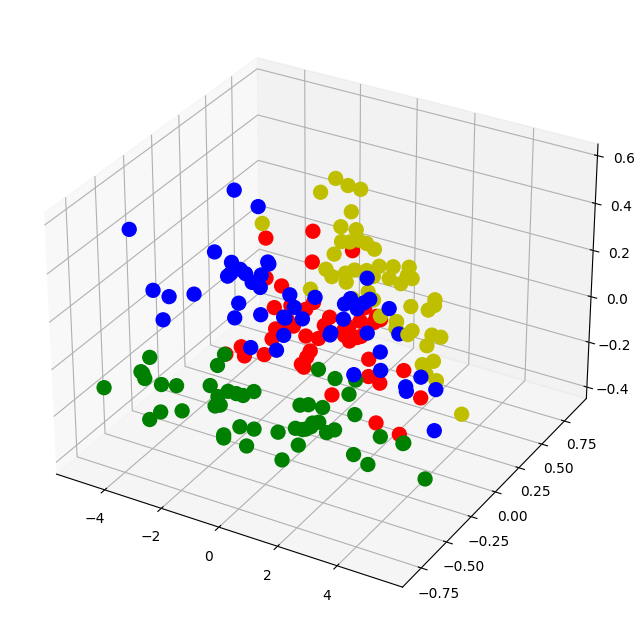

In [57]:
colors_crabs = {'BlueFemale': 'y', 'BlueMale': 'b', 'OrangeFemale': 'r', 'OrangeMale': 'g'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(crabs_standardized.PC1,crabs_standardized.PC2,zs=crabs_standardized.PC3,
            depthshade=False, c=crabs['class'].apply(lambda x: colors_crabs[x]),s=100)


In [59]:
  fig = px.scatter_3d(crabs_standardized, x = 'PC1', y='PC2', z='PC3', color='class')
  fig.show()